In [1]:
#Challenge 1
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)


df0504=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt')
df0511=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt')
df0518=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt')
df0525=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')
dfinitial=pd.concat([df0504,df0511,df0518,df0525]).reset_index(drop=True)


In [62]:
df=dfinitial
for col in df.columns:
    df = df.rename(columns={col: col.rstrip()})

In [63]:
#Challenge 2, plus other date stuff for later challenges
df['DATETIME']=df['DATE']+' '+df['TIME']
df['DATETIME']=pd.to_datetime(df['DATETIME'])
df['DATE']=pd.to_datetime(df['DATE'])
df['WEEK OF YEAR']=df['DATETIME'].dt.weekofyear
df['DAY OF WEEK']=df['DATETIME'].dt.dayofweek.astype('int')
df['WEEKEND']=(df['DAY OF WEEK']==5)|(df['DAY OF WEEK']==6)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEK OF YEAR,DAY OF WEEK,WEEKEND
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-27,00:00:00,REGULAR,7035249,2384833,2019-04-27 00:00:00,17,5,True
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-27,04:00:00,REGULAR,7035269,2384840,2019-04-27 04:00:00,17,5,True
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-27,08:00:00,REGULAR,7035292,2384875,2019-04-27 08:00:00,17,5,True
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-27,12:00:00,REGULAR,7035392,2384951,2019-04-27 12:00:00,17,5,True
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-27,16:00:00,REGULAR,7035651,2385020,2019-04-27 16:00:00,17,5,True
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-27,20:00:00,REGULAR,7035930,2385070,2019-04-27 20:00:00,17,5,True
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-28,00:00:00,REGULAR,7036100,2385087,2019-04-28 00:00:00,17,6,True
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-28,04:00:00,REGULAR,7036119,2385088,2019-04-28 04:00:00,17,6,True
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-28,08:00:00,REGULAR,7036125,2385103,2019-04-28 08:00:00,17,6,True
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-28,12:00:00,REGULAR,7036197,2385155,2019-04-28 12:00:00,17,6,True


In [64]:
df['WEEKEND'].value_counts()

False    591170
True     231819
Name: WEEKEND, dtype: int64

In [4]:
#Challenge 3
df=df[df['TIME']=='00:00:00']
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION","DATE"], inplace=True)
df['NET ENTRIES']=abs(df.groupby(['C/A','UNIT','SCP','STATION'])['ENTRIES'].diff(-1)*-1)
df['NET EXITS']=abs(df.groupby(["C/A", "UNIT", "SCP", "STATION"])['EXITS'].diff(-1)*-1)
df=df[df['NET ENTRIES']<50000]
df['DAYS DIFF']=df.groupby(["C/A", "UNIT", "SCP", "STATION"])['DATE'].diff(-1)*-1
df['DAYS DIFF']=df['DAYS DIFF'].dt.days
df['NET ENTRIES']=df['NET ENTRIES']//df['DAYS DIFF']
df['NET EXITS']=df['NET EXITS']//df['DAYS DIFF']
df['NET MOVEMENT']=df['NET ENTRIES']+df['NET EXITS']
df.dropna(inplace=True)

#Optimization- deal with resetting counters in a better way

In [5]:
df['NET ENTRIES'].sort_values()

822242        0.0
499631        0.0
499595        0.0
499589        0.0
499547        0.0
           ...   
776343    11593.0
776385    11686.0
573425    11686.0
5799      14224.0
635285    34006.0
Name: NET ENTRIES, Length: 64089, dtype: float64

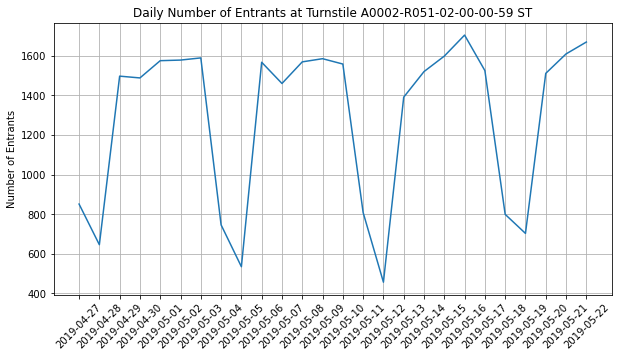

In [7]:
#Challenge 4
logic=(df['C/A']=='A002')&(df['UNIT']=='R051')&(df['SCP']=='02-00-00')&(df['STATION']=='59 ST')
dfsingleturn=df[logic]
plt.figure(figsize=[10,5])
plt.plot(dfsingleturn['DATETIME'],dfsingleturn['NET ENTRIES'])
plt.xticks(dfsingleturn['DATETIME'],rotation=45);
plt.ylabel('Number of Entrants')
plt.grid()
plt.title('Daily Number of Entrants at Turnstile A0002-R051-02-00-00-59 ST');

In [8]:
#Challenge 5
df.groupby(['C/A','UNIT','STATION','DATE'])['NET ENTRIES'].sum()

C/A    UNIT  STATION     DATE      
A002   R051  59 ST       2019-04-27     8394.0
                         2019-04-28     6337.0
                         2019-04-29    13132.0
                         2019-04-30    13664.0
                         2019-05-01    13748.0
                                        ...   
S101A  R070  ST. GEORGE  2019-05-18     2990.0
                         2019-05-19     2000.0
                         2019-05-20     7598.0
                         2019-05-21     7898.0
                         2019-05-22     7933.0
Name: NET ENTRIES, Length: 9740, dtype: float64

In [9]:
#Challenge 6
dfstatday=df.groupby(['STATION','DATE','WEEK OF YEAR','DAY OF WEEK'])['NET ENTRIES'].sum()
dfstatday=dfstatday.reset_index()
dfstatday.loc[dfstatday['DATE']=='2019-05-24','NET ENTRIES']=np.NaN

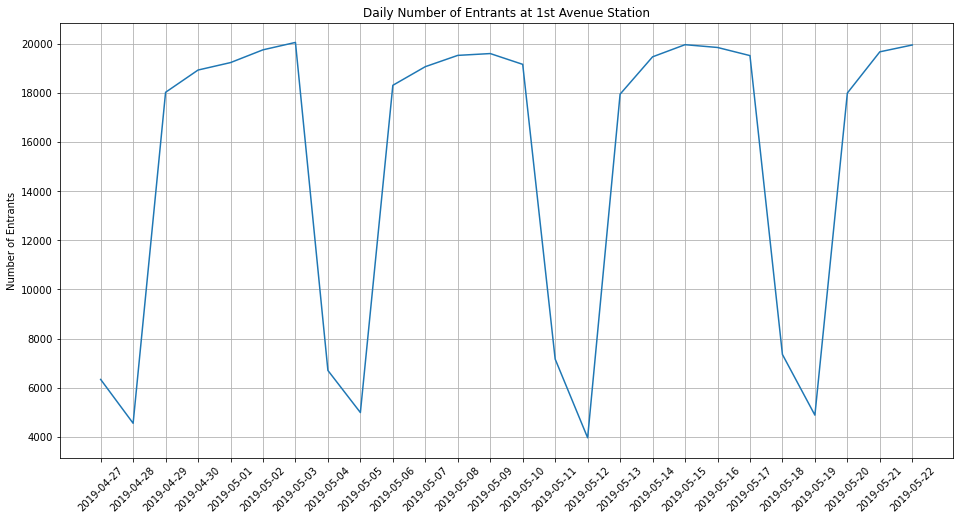

In [10]:
#Challenge 7
dffirstavstat=dfstatday[dfstatday['STATION']=='1 AV']
dffirstavstat=dffirstavstat.reset_index(drop=True)
plt.figure(figsize=[16,8])
plt.plot(dffirstavstat['DATE'],dffirstavstat['NET ENTRIES'])
plt.xticks(dffirstavstat['DATE'],rotation=45);
plt.ylabel('Number of Entrants')
plt.grid()
plt.title('Daily Number of Entrants at 1st Avenue Station');

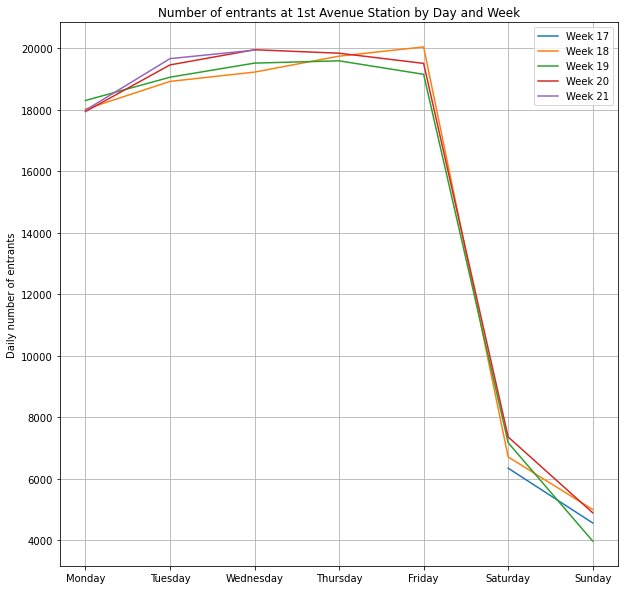

In [11]:
#dffirstavstat.loc[dfstatday['WEEK OF YEAR']==17,'NET ENTRIES']
#Challenge 8
plt.figure(figsize=[10,10])
for week in dffirstavstat['WEEK OF YEAR'].unique():
    x=dffirstavstat.loc[dffirstavstat['WEEK OF YEAR']==week,'DAY OF WEEK']
    y=dffirstavstat.loc[dffirstavstat['WEEK OF YEAR']==week,'NET ENTRIES']
    plt.plot(x,y,label='Week '+str(week))
plt.legend()
daysofweek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(sorted(dffirstavstat['DAY OF WEEK'].unique()),daysofweek)
plt.ylabel('Daily number of entrants')
plt.title('Number of entrants at 1st Avenue Station by Day and Week');
plt.grid()

In [12]:
#Challenge 9
df.groupby('STATION')['NET ENTRIES'].sum().sort_values(ascending=False)
#Outliers are usually due to the entries counter being reset or missing data

STATION
34 ST-HERALD SQ    2862446.0
34 ST-PENN STA     2701990.0
TIMES SQ-42 ST     2369650.0
59 ST COLUMBUS     1735689.0
GRD CNTRL-42 ST    1633363.0
                     ...    
AQUEDUCT RACETR      31459.0
CYPRESS HILLS        30027.0
BEACH 36 ST          20253.0
BEACH 44 ST          15389.0
ORCHARD BEACH            4.0
Name: NET ENTRIES, Length: 212, dtype: float64

In [33]:
#Challenge 9, corrected for outliers

totaldf=df.groupby(['STATION','DATE'])['NET ENTRIES'].sum().reset_index()
totaldf=totaldf.groupby('STATION')['NET ENTRIES'].mean().sort_values(ascending=False).reset_index()
totaldf['NET ENTRIES']=totaldf['NET ENTRIES'].astype('int')
top10daily=totaldf.head(10)
print(top10daily)

           STATION  NET ENTRIES
0  34 ST-HERALD SQ       110094
1   34 ST-PENN STA       103922
2   TIMES SQ-42 ST        91140
3   59 ST COLUMBUS        66757
4  GRD CNTRL-42 ST        62821
5            23 ST        61114
6  42 ST-PORT AUTH        60783
7            86 ST        58778
8            59 ST        57428
9      CHAMBERS ST        51888


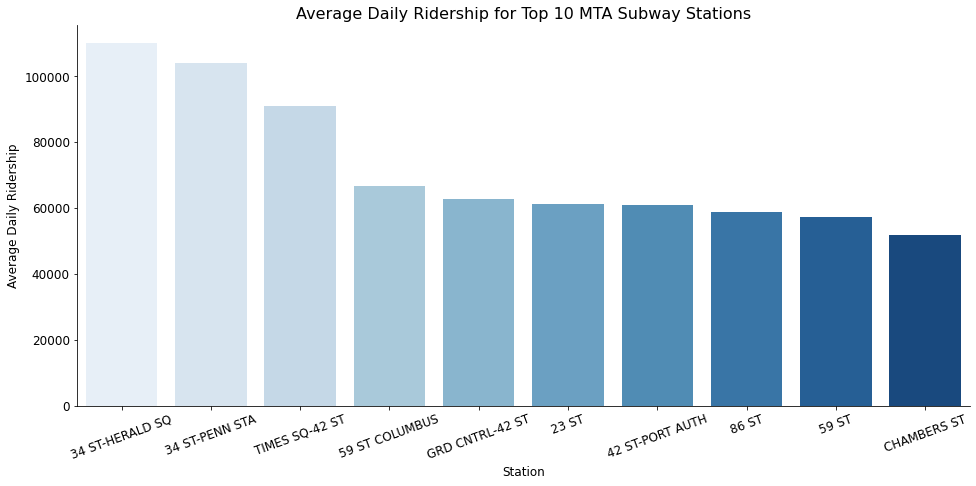

In [53]:
import seaborn as sns
plt.figure(figsize=[16,7])
font={'size':12}
plt.rc('font', **font) 
sns.barplot(x ='STATION',y='NET ENTRIES',data=top10daily,palette=sns.color_palette("Blues",10));
plt.xticks(rotation=20);
plt.xlabel('Station')
plt.ylabel('Average Daily Ridership')
plt.title('Average Daily Ridership for Top 10 MTA Subway Stations',size=16)
sns.despine()


In [ ]:
#Average Weekend vs Weekday Ridership per day

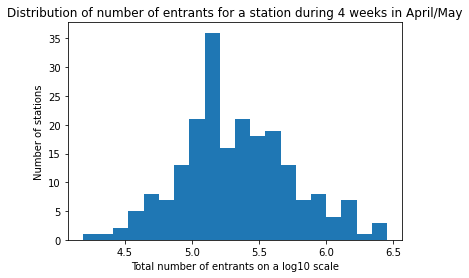

In [15]:
#Challenge 10
plt.hist(np.log10(totaldf),20);
plt.xlabel('Total number of entrants on a log10 scale')
plt.ylabel('Number of stations')
plt.title('Distribution of number of entrants for a station during 4 weeks in April/May');


In [ ]:

#For missing dates, create a new diff column for number of days between row, then we can divide the net entries by
#the number of days
df.groupby(['C/A','UNIT','SCP','STATION','DATE'])['ENTRIES'].count().sort_values()

In [ ]:
df[(df['C/A']=='A038')&(df['UNIT']=='R085')&(df['SCP']=='00-06-00')]

In [ ]:
df[(df['C/A']=='N508')&(df['UNIT']=='R453')&(df['SCP']=='00-00-00')]['DATE'].value_counts()